In [1]:
#Code to connect your google drive with google colaboratory
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Import useful packages**

In [2]:
#Importing some useful packages

import numpy as np #N umpy library provides various useful functions and operators for scientific computing
import cv2 as cv # openCV is a key library that provides various useful functions for computer vision
import os # Honestly this one is a bit optional.
import glob # again just optional
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # To display the Confusion Matrix
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

**Find Image and Import the Image to process it.**

(1000, 2000, 3) 



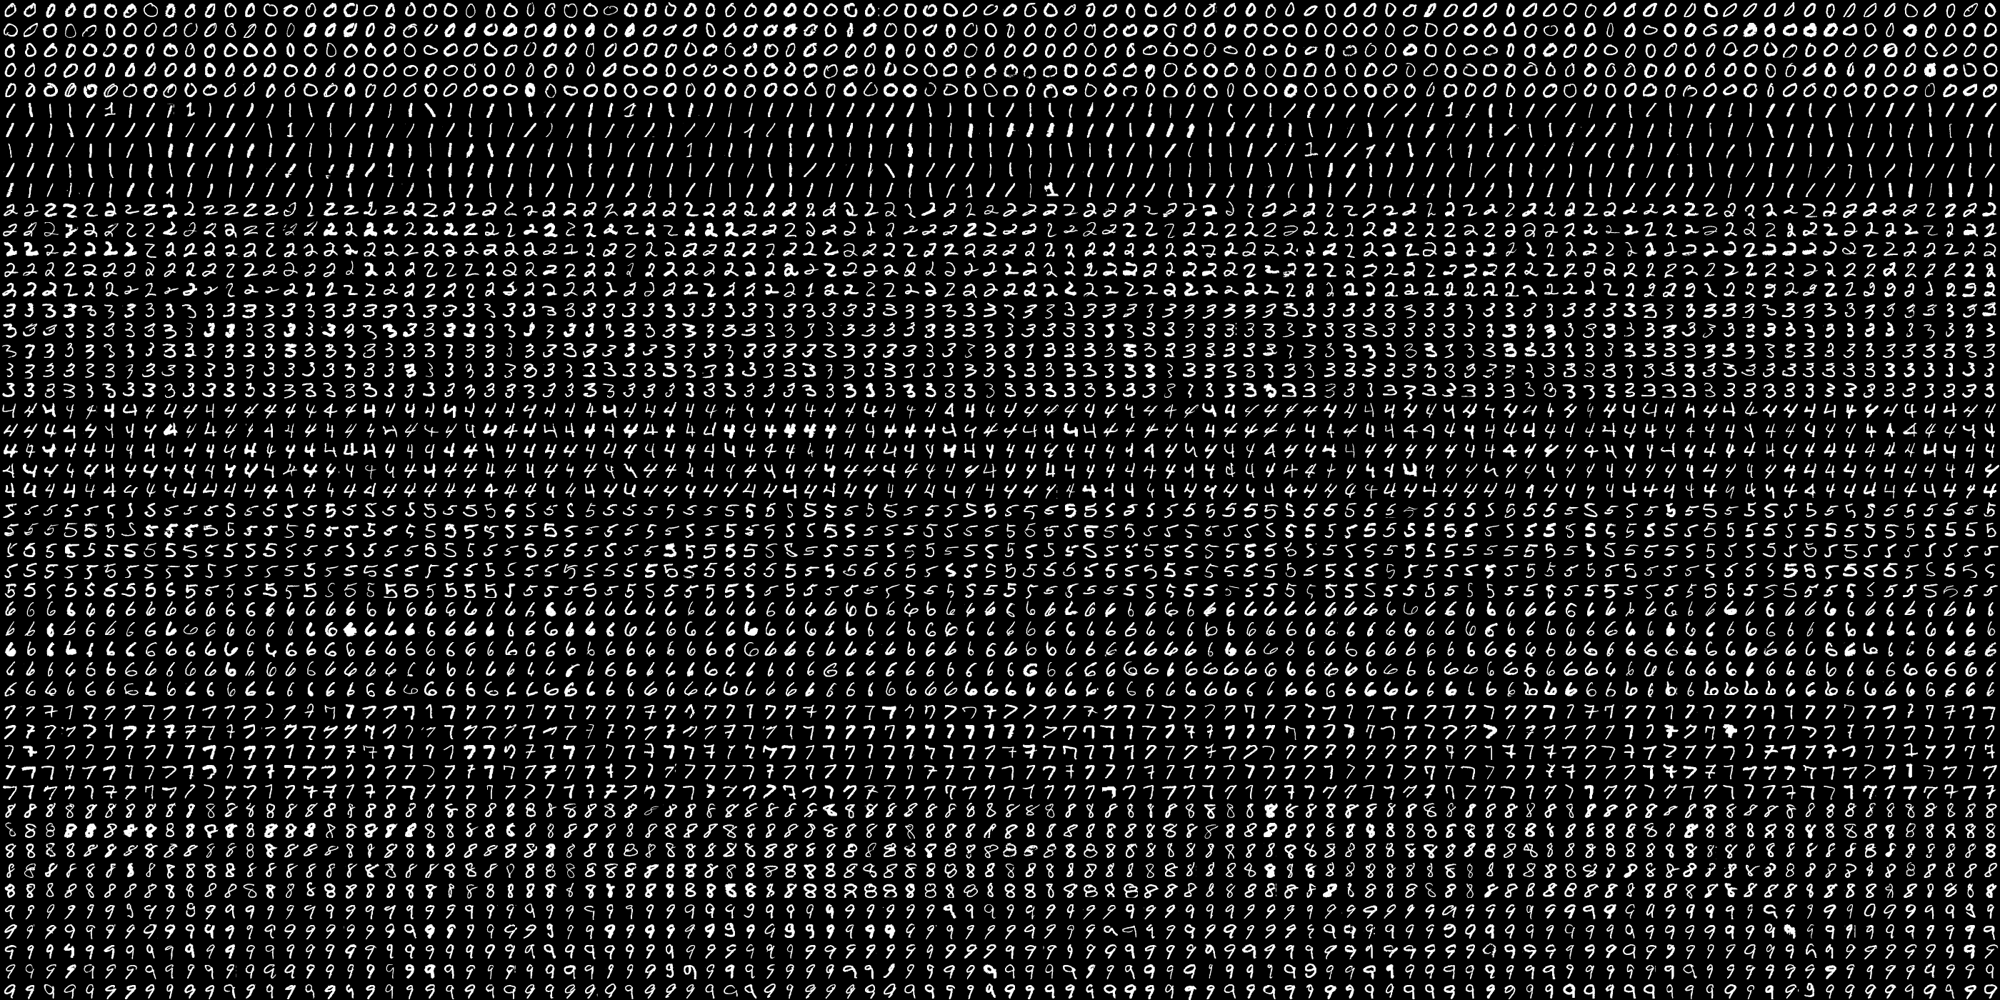

In [3]:
path = '/content/drive/MyDrive/MachinePerception/Assignment/' # Defining the path
img = cv.imread(path+'digits.png')
height, width, channels = img.shape

print(img.shape, "\n") # Shape of the Image

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) # This might not be needed since the image is already in gray scale

cv2_imshow(gray)  # Display the Image

# 100 digits each row
# 5 rows for each digit
# 10 Digits

cv2_imshow(gray[:20,:20])

**Question One:**

**Extract the tiny images from the big image, split them into training images (80%) and testing images (20%), and write them as images (e.g. jpeg files) and store the training images in the “Train” folder and store the testing images in the “Test” folder.**


In [4]:
# All Below Code are From Prac 5 Worksheet In COMP3007. Prac 05 Exercise 3

# Now we split the image to 5000 cells, each 20x20 size
# hsplit() into 100 cols and vsplit() into 50 rows
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare the training data and test data
test = x[0:50,:20].reshape(-1,400).astype(np.float32) # Testing will be the First 20 Samples from each Row
train = x[0:50,20:100].reshape(-1,400).astype(np.float32)  # Training will be the Last 80 Samples of each Row

print(f"The Number of Testing Sample is {test.shape[0]}.")
print(f"\nThe Number of Training Sample is {train.shape[0]}.")

train_path = '/content/drive/MyDrive/MachinePerception/Assignment/Training'
test_path = '/content/drive/MyDrive/MachinePerception/Assignment/Testing'

# Function Iterate through the training/Testing samples and save them to the Training/Testing folder
def save_image(data, path, name):
    for i in range(len(data)):
        digit = data[i].reshape(20, 20).astype(np.uint8)  # Reshape and convert to uint8
        file_name = os.path.join(path, f"{name}_{i}.jpeg")
        cv.imwrite(file_name, digit)

save_image(train, train_path, 'train')
save_image(test, test_path, 'test')

print("\nAll Extracted Image arranged into \"Training\" and \"Testing\" Folders")

# Create labels for train and test data
k=np.arange(10) ## 2 Classes, 0 to 9
train_labels = np.repeat(k,400)[:,np.newaxis] # Repeat each 0 to 9 400 times, So adding up to 80% of 5000, Which is 4000
test_labels = np.repeat(k,100)[:,np.newaxis]  # Repeat each 0 to 9 100 times, So adding up to 20% of 5000, Which is 1000

The Number of Testing Sample is 1000.

The Number of Training Sample is 4000.

All Extracted Image arranged into "Training" and "Testing" Folders


**Quesiton Two:**

**Nearest Neighbor Method For Image Classification**

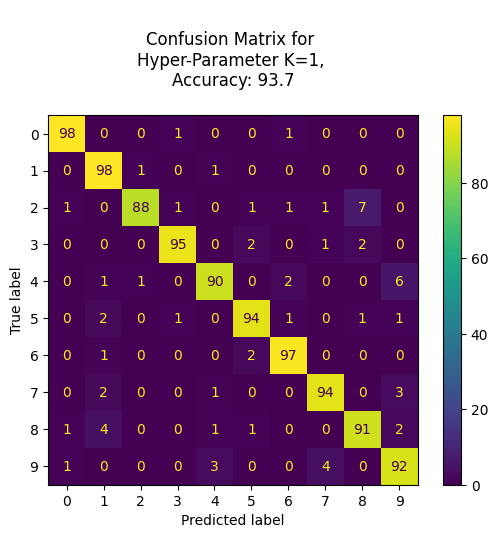

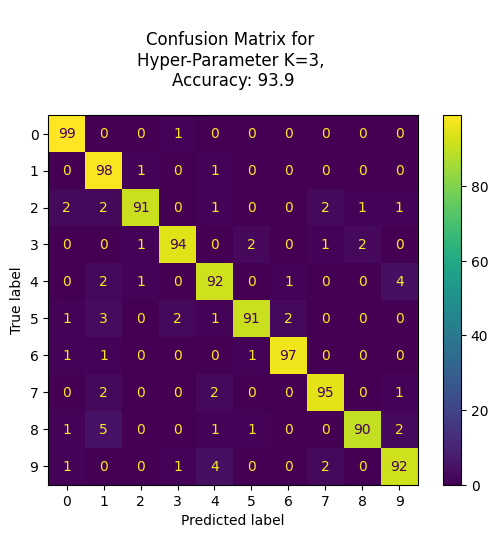

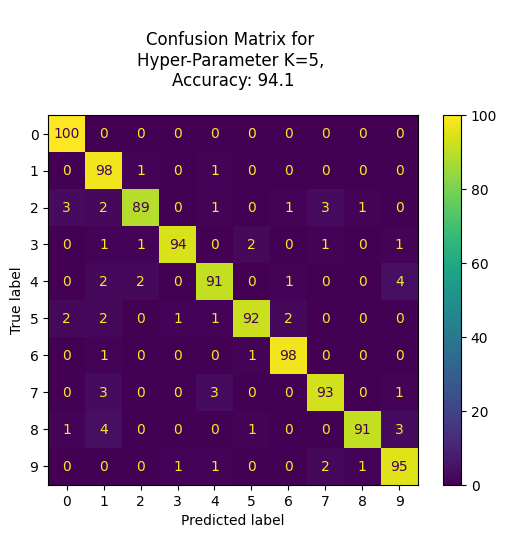

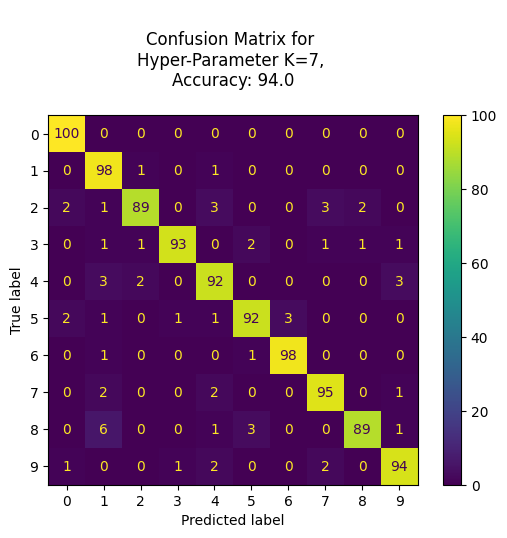

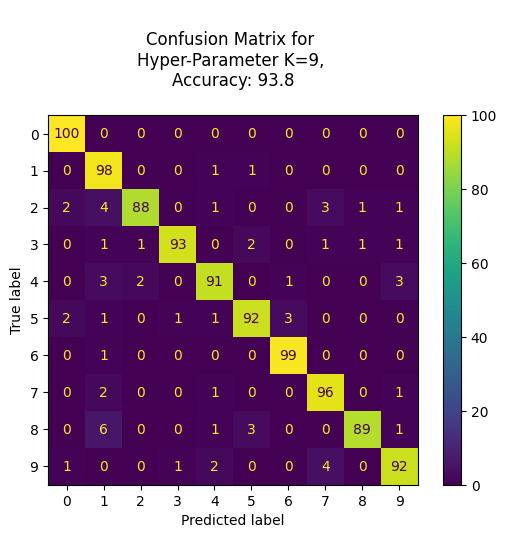


Show all the Accuracy of different K_value:

The Result For k = 1 is 93.7%
The Result For k = 3 is 93.9%
The Result For k = 5 is 94.1%
The Result For k = 7 is 94.0%
The Result For k = 9 is 93.8%

Show all the Accuracy of different Class Labels in for the Highest K_Value:

The Result For Class 0 is 100% 
The Result For Class 1 is 98% 
The Result For Class 2 is 88% 
The Result For Class 3 is 93% 
The Result For Class 4 is 91% 
The Result For Class 5 is 92% 
The Result For Class 6 is 99% 
The Result For Class 7 is 96% 
The Result For Class 8 is 89% 
The Result For Class 9 is 92% 


In [5]:
# Define the K Values to be  Tested
k_values = [1,3,5,7,9]

# Initialise Lists to store the Accuracy Result and Confusion Matrix Results for Different K Vlaues
accuracies = []
confusion_matrices = []

# Create and train the KNN classifier
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)

# Loop to test different K Values
# From Prac 5 Worksheet In COMP3007. Prac 05 Exercise 3
for k in k_values:

    # Make predictions on the test data
    ret, result, neighbors, dist = knn.findNearest(test, k=k)

    # Calculate accuracy and store it
    matches = result == test_labels
    correct = np.count_nonzero(matches)
    accuracy = correct * 100.0 / result.size
    accuracies.append(accuracy)

    # Calculate and store the confusion matrix
    # Every CM here will be the result of one label. So starting from digit 0
    # 98 of them are correct and 1 seen as 3, one seen as 6
    cm = confusion_matrix(test_labels, result)
    confusion_matrices.append(cm)

    # # Plot confusion matrices for all K values
    # Idea From : https://www.w3schools.com/python/python_ml_confusion_matrix.asp
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot()
    # Printing out different Test cases for different Hyper-Parameter and Their accurracies.
    plt.title(f"\nConfusion Matrix for \nHyper-Parameter K={k}, \nAccuracy: {accuracy}\n")
    plt.show()

# So far the Highest is with the K Value of 5 and an Accuracy of 94.1%

# Quick Result for Further Comparison
print("\nShow all the Accuracy of different K_value:\n")
for i in range(len(k_values)):
    k = k_values[i]
    print(f"The Result For k = {k} is {accuracies[i]}%")

# Find the Highest Overall Accuracy Out of all the K_values
best_k_value = k_values[np.argmax(accuracies)]

# Quick Result for Accuracy for each Label from 0 to 9
print("\nShow all the Accuracy of different Class Labels in for the Highest K_Value:\n")
for i in range(10):
  print(f"The Result For Class {i} is {(confusion_matrices[best_k_value-1])[i][i]}% ")

# Another Way to Possibly do the KNN Method (Same Result after Testing) A Quick Example Below
# from sklearn.neighbors import KNeighborsClassifier # This Part Import the Library for the KNeighborsClassifier
# knn_1 = KNeighborsClassifier(n_neighbors = 5) # This Part Sets the Number of K Value
# knn_1.fit(train,train_labels) # Train the Data
# y_pred_1 = knn_1.predict(test)  # Predict Test Image's Label
# print(accuracy_score(test_labels, y_pred_1))  # Calculate the Score comparing to Predict label and Actual Label

**Question Three:**

**Linear Classifier for Image Classification (SVM and Compare with KNN)**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider

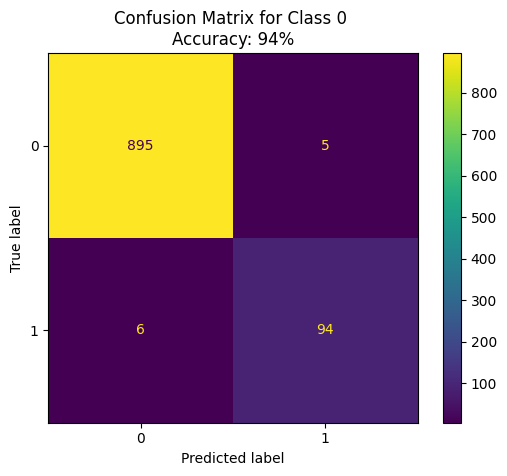

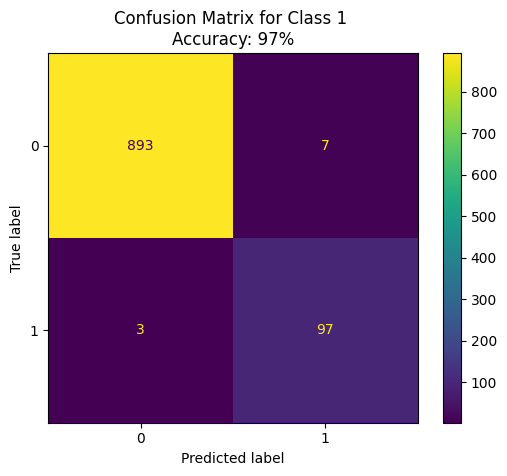

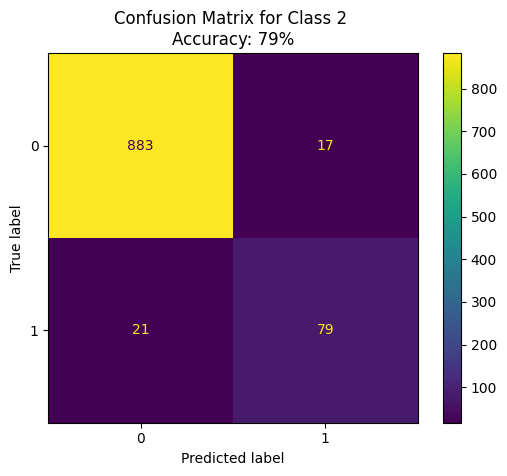

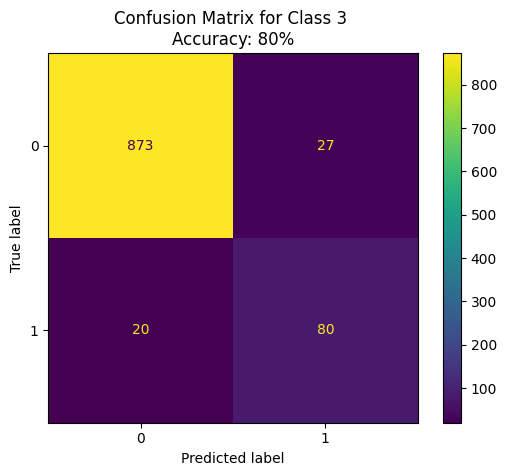

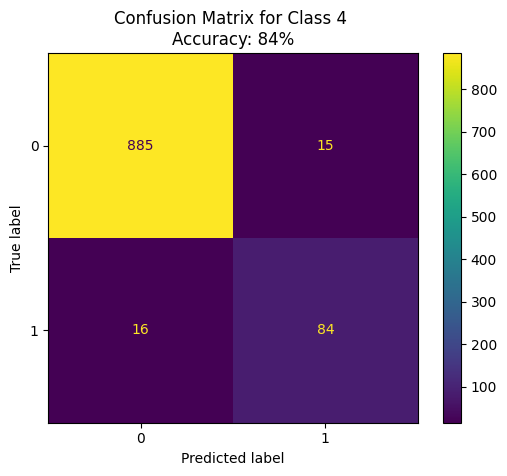

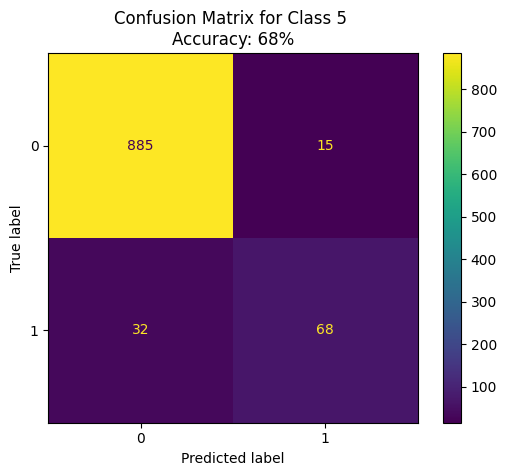

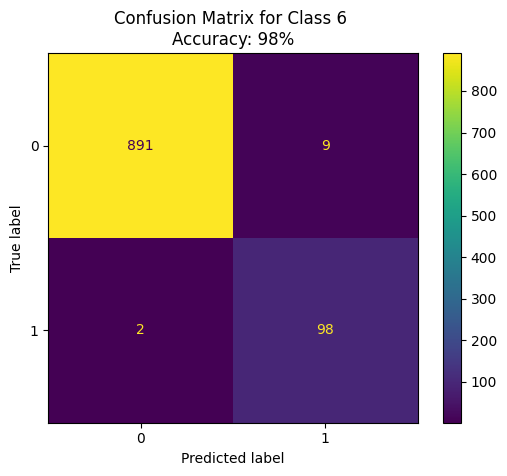

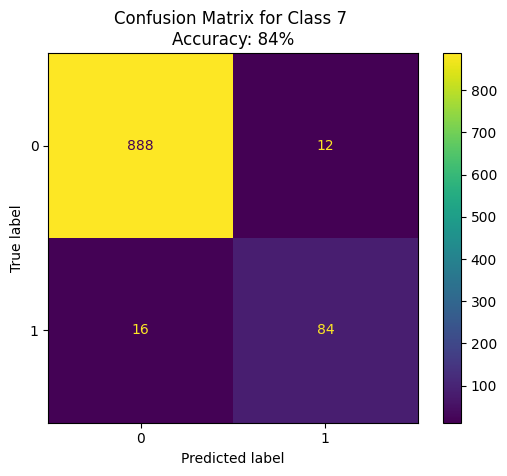

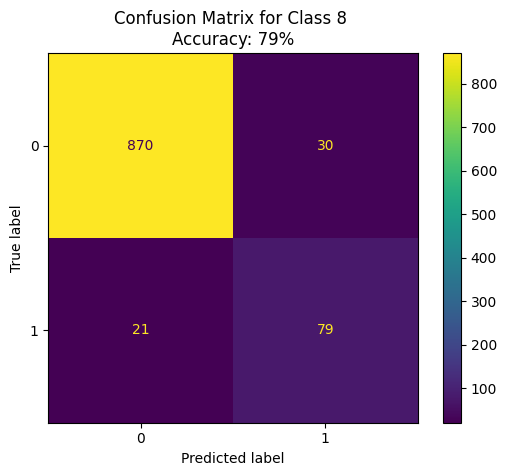

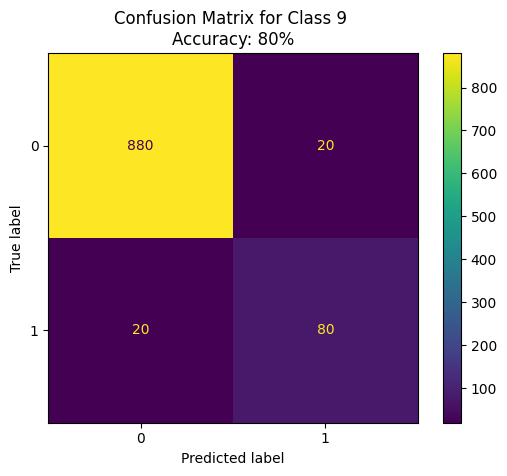

The Result For Class 0 is 94%
The Result For Class 1 is 97%
The Result For Class 2 is 79%
The Result For Class 3 is 80%
The Result For Class 4 is 84%
The Result For Class 5 is 68%
The Result For Class 6 is 98%
The Result For Class 7 is 84%
The Result For Class 8 is 79%
The Result For Class 9 is 80%

Overall Accuracy is 84.3%


In [6]:
# OvR Classifier Support Vector Machine -
# From Prac 5 Worksheet In COMP3007. Prac 05 Exercise 3
# SVC and OvR Methods from Website: https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier.fit

# OvR is to Compare each class with all the other class
# Eg. Compare 0 with 1-9, or Compare 1 with 0 and 2-9 etc.
# In this case, we will need to do it Ten times since we have 10 classes 0-9

# Initialise Lists to store the Accuracy Result and Confusion Matrix Results for Different K Vlaues
accuracies = []

# Create the Support Vector Machine
svm = SVC(kernel='linear', max_iter=4000, tol=1e-8, C=1)

# Create a OneVsRestClassifier
classifier = OneVsRestClassifier(svm)

# Train the Classifier on the Training Data
classifier.fit(train, train_labels)

# Loop 10 Times to Go Through all the 10 Digit Classes
for i in range(10):
    # Create a binary label vector for the OvR. The Unique Class Label been One while changing the Rest to Zero
    binary_test_labels = np.where(test_labels == i, 1, 0)

    # Make predictions on the test data using the Trained Classifier for the Current Class
    predictions = classifier.predict(test)
    binary_prediction = np.where(predictions == i, 1, 0)

    # Calculate accuracy
    correct = 0
    for j in range(len(binary_prediction)):
        if (binary_prediction[j] == 1) & (binary_test_labels[j] == 1):
              correct += 1
    accuracies.append(correct)

    # Calculate and Plot the Confusion Matrix
    cm = confusion_matrix(binary_test_labels, binary_prediction)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot()
    plt.title(f"Confusion Matrix for Class {i} \nAccuracy: {correct}%")
    plt.show()

# Quick Result for Further Comparison
for i in range(10):
    print(f"The Result For Class {i} is {accuracies[i]}%")

overall = round(sum(accuracies)/10, 2)
print(f"\nOverall Accuracy is {overall}%")

In [7]:
# Create and train the Support Vector Machine For Multi-Class

svm = cv.ml.SVM_create()
svm.setType(cv.ml.SVM_C_SVC)
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, 1000, 1e-8))
svm.train(train, cv.ml.ROW_SAMPLE, train_labels)
response = svm.predict(test)
result = np.uint8(response[1])

cm = confusion_matrix(test_labels, result)
print(cm)

# Calculate accuracy and store it
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

[[98  0  0  2  0  0  0  0  0  0]
 [ 0 97  1  0  1  0  0  0  0  1]
 [ 1  1 84  1  3  0  2  3  5  0]
 [ 0  1  1 91  0  4  0  1  1  1]
 [ 0  1  4  0 92  0  0  1  0  2]
 [ 1  1  1  5  0 90  2  0  0  0]
 [ 0  0  0  0  0  2 98  0  0  0]
 [ 1  0  1  2  3  0  0 90  0  3]
 [ 2  6  0  1  1  1  1  1 86  1]
 [ 1  0  0  0 10  1  0  6  0 82]]
90.8


In [ ]:
# Compare The Result Between KNN and OvR-SVM


# KNN -

# The Result For k = 1 is 93.7%
# The Result For k = 3 is 93.9%
# The Result For k = 5 is 94.1%
# The Result For k = 7 is 94.0%
# The Result For k = 9 is 93.8%

# # For the Highest K_value 5. The Individual Class Label Accuracy is:

# The Result For Class 0 is 100%
# The Result For Class 1 is 98%
# The Result For Class 2 is 88%
# The Result For Class 3 is 93%
# The Result For Class 4 is 91%
# The Result For Class 5 is 92%
# The Result For Class 6 is 99%
# The Result For Class 7 is 96%
# The Result For Class 8 is 89%
# The Result For Class 9 is 92%

# OvR-SVM

# For this, We Use the MAX_ITER with the Highest Overall Accuracy, and these are the few Highest:

# This Changes based on differenet MAX_ITER For 100: 63.7%
# This Changes based on differenet MAX_ITER For 2000: 82.40%
# This Changes based on differenet MAX_ITER For 4000: 84.30%

# So We show the Individual Class Label Accuracy for MAX_ITER 4000 since it has the Highest.

# The Result For Class 0 is 94%
# The Result For Class 1 is 97%
# The Result For Class 2 is 79%
# The Result For Class 3 is 80%
# The Result For Class 4 is 84%
# The Result For Class 5 is 68%
# The Result For Class 6 is 98%
# The Result For Class 7 is 84%
# The Result For Class 8 is 79%
# The Result For Class 9 is 80%

# Comparing Between KNN and OvR_SVM, KNN is the Better choice


**Question Four:**

**Image classification using bag of visual words**




1. We extract local features from several images using SIFT.





2. Quantize the feature space. Make this operation via clustering algorithms such as K-means. The center points, that we get from the clustering algorithm, are our visual words.





3. Extract local features and compare these features with visual words to create histograms for each image both for the test and train dataset.





4. Predict the class of test images comparing with each histogram of train images. We will use 1-NN to predict the class of each test image.





5. Calculate the accuracy.









In [9]:
# Reference From the Given Material -> Website: https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f

# Step One. We have all the 5000 Tiny Digits Extracted in the tiny_digits List Already, Now we do the SIFT Part.

# A Dictionary to store the Unique Class Digits 0 to 9
train_images = {}
test_images = {}

# Loop 10 times to store the Unique Class (Train Data)
for i in range(10):
    # List to store all the images that are the same class
    image = []
    # The 400 of that Digit to be inserted into the Unique Class
    for j in range(400):
        img = train[(i * 400) + j]
        if img.shape != (20, 20):
            img = img.reshape(20, 20).astype(np.uint8)
        image.append(img)
    train_images[i] = image

# Loop 10 times to store the Unique Class (Test Data)
for i in range(10):
    # List to store all the images that are the same class
    image = []
    # The 100 of that Digit to be inserted into the Unique Class
    for j in range(100):
        img = test[(i * 100) + j]
        if img.shape != (20, 20):
            img = img.reshape(20, 20).astype(np.uint8)
        image.append(img)
    test_images[i] = image

# Create Function to do SIFT Extraction
# Following Ideas Taken from the Website mentioned above
def sift_features(images):
    # Create the SIFT Detector.
    sift = cv.SIFT_create()
    descriptors_list = [] # List to Hold ALL SIFT Descriptor From ALL Image.
    sift_vectors = {} # Dictionary Which Store SIFT Vectors by Class.

    # For Every Unique Class Digits
    for key, value in images.items():
        features = []
        # Extract for each Image in that Class
        for img in value:
            # Compute and Detect the Features of the Given Image
            kp, des = sift.detectAndCompute(img, None)

            if kp is not None and des is not None:
                descriptors_list.extend(des)
                features.append(des)
        sift_vectors[key] = features
    return [descriptors_list, sift_vectors]

# Here, I only Implemented the SIFT Function Rather than Having the HOG Aswell
# It is because that SIFT is Better at Scale Invariant, Roatation Invariance etc
# And HOG is Also more Complex to Implement And Requires more CPU and GPU Power to process.

sifts = sift_features(train_images)
descriptor_list = sifts[0]
all_bovw_feature = sifts[1]
test_bovw_feature = sift_features(test_images)[1]

# Apply KMeans Clustering For the Training Descriptor.
# To Group Similar Data Points into Clusters
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_
    return visual_words

# Here, The KMean Number is Very Important! It is Grouping the Data into Clusters. And Having a Right Cluster Will help Grouping The Data into Meaningful Clusters
# But In here, Bigger KMeans also mean that it will Take Longer to Process and Might not Give the Best Compare to Lower Ones. (Speed and Efficiency and Accuracy Should be Considered)
# Another Important Thing! KMean Number Should not be More Than The Amount Of Data Points!!!!

# The Difference Between K = 100 and K = 2500
#   Accruacy Around 10% Difference
#   Time Taken One Can be Within a Minute Or Two While One Can Take Up to Ten Plus Minutes

k_mean_Number = 2500

# HERE!!! Visual Word Is Equivalent to a Cluster Centroid
visual_words = kmeans(k_mean_Number, descriptor_list)

# This function is to find the Index that is closest the Center ( The Visual Words )
def find_index(feature_vector, centers):
    #Initialise the Variables to find the Index of the Nearest Center
    closest = float('inf')
    index = -1

    # Loop Though all the Centers
    for i, center in enumerate(centers):
        # Calc the Distance Between the Feature_Vector and the Current Center
        dist = np.linalg.norm(feature_vector - center)
        # Check if New Center is Closer than Previous Closest
        if dist < closest:
            closest = dist
            index = i
    return index

# Create the Histograms for the Test and Train Datas

# This create_histograms Function is to Compare each Feature Vector with all the Cluster Centroids
# To find the Closest Centroid to Each Feature Vectors. To Assign Feature Vectors to Clusters and Creating the
# Histogram based on the Amount of Assignment

# Following Ideas Taken from the Website mentioned above
def create_histograms(all_bovw, centers):
    # Dictionary on Features for Different Classes
    dict_feature = {}
    for key, value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            for each_feature in img:
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature

# Create histograms for train data, Used for Training
train_histograms = create_histograms(all_bovw_feature, visual_words)

# Create histograms for test data, Used for Prediction
test_histograms = create_histograms(test_bovw_feature, visual_words)

# Following Ideas Taken from the Website mentioned above
# Directly tooken from Website
def knn(trained, test):
    # Initialise the Count of Test Image and Another for Correct Prediction.
    num_test = 0
    correct_predict = 0
    # Create a Dictionary to Store Results for Each Class
    class_based = {}

    # Loop through each test image
    for test_key, test_val in test.items():
        # Initialise Correct and Total counts for this Class
        class_based[test_key] = [0, 0]

        # Loop through each test image in the current class
        for tst in test_val:
            predict_start = 0
            # Variable to store the minimum distance
            minimum = 0
            # Variable to store the predicted class label
            key = "a"

            # Compare the test image with all training images
            for train_key, train_val in trained.items():
                for train in train_val:
                    if predict_start == 0:
                        # If this is the first comparison, set the minimum distance and predicted class
                        minimum = distance.euclidean(tst, train)
                        key = train_key
                        predict_start += 1
                    else:
                        # For subsequent comparisons, calculate the distance
                        dist = distance.euclidean(tst, train)
                        if dist < minimum:
                            # If a closer match is found, update the minimum distance and predicted class
                            minimum = dist
                            key = train_key

            # Check if the Predicted Class Matches the True Class
            if test_key == key:
                # Increase the Count of Correct predictions for this test image and the Correct Count for this Class
                correct_predict += 1
                class_based[test_key][0] += 1

            # Increase the Total Test Count for this Image and Total Count for this Class
            num_test += 1
            class_based[test_key][1] += 1

    # Return the total number of test images, total correct predictions, and class-based results
    return [num_test, correct_predict, class_based]

# This is Implemented to be Similar to the Above Function But Instead of KNN, You Use SVM
def svm_classifier(train_histograms, test_histograms):
    # Initialise the Count of Test Image and Another for Correct Prediction.
    num_test = 0
    correct_predict = 0
    # Create a Dictionary to Store Results for Each Class
    class_based = {}

    # Create an SVM classifier with a linear kernel
    # MAX ITER here is Also Very Important! It is setting the Maximum Number of Iterations the Algorithm Update its Model
    # Which is used to find the Best Decision Boundary to Separate the Data Points.
    MAX_ITER = 4000
    svm = SVC(kernel='linear', max_iter=MAX_ITER, tol=1e-8, C=1)

    # Prepare the training data and labels
    X_train = []
    y_train = []
    for label, histograms in train_histograms.items():
        for histogram in histograms:
            X_train.append(histogram)
            y_train.append(label)

    # Train the SVM Classifier on the Training Data
    svm.fit(X_train, y_train)

    # Loop through each Test Image
    for test_key, test_val in test_histograms.items():
        # Initialise correct and total counts for this class
        class_based[test_key] = [0, 0]

        # Loop through each test image in the Current Class
        for histogram in test_val:
            # Predict the Class Label
            predicted_label = svm.predict([histogram])[0]

            # Check if the predicted class matches the true class
            if test_key == predicted_label:
                correct_predict += 1
                class_based[test_key][0] += 1

            num_test += 1
            class_based[test_key][1] += 1

    # Return the total number of test images, total correct predictions, and class-based results
    print(f"\nFor K Mean = {k_mean_Number} and MAX ITERATION = {MAX_ITER}")

    return [num_test, correct_predict, class_based]

# Call the knn function to perform k-nearest neighbor classification knn_classifier(train_histograms, test_histograms)
results_bowl = svm_classifier(train_histograms, test_histograms)

# Calculates the average accuracy and class based accuracies.
def accuracy(results):
    avg_accuracy = (results[1] / results[0]) * 100
    print("\nAverage accuracy: %" + str(avg_accuracy))
    print("\nClass based accuracies: \n")
    for key,value in results[2].items():
        acc = (value[0] / value[1]) * 100
        new = "{:.2f}".format(acc)
        print(f"Class {key} : {new} %")

# Calculates the accuracies and write the results to the console.
accuracy(results_bowl)


For K Mean = 2500 and MAX ITERATION = 4000

Average accuracy: %76.21744054360136

Class based accuracies: 

Class 0 : 83.16 %
Class 1 : 94.92 %
Class 2 : 70.97 %
Class 3 : 72.92 %
Class 4 : 80.00 %
Class 5 : 59.04 %
Class 6 : 72.83 %
Class 7 : 69.51 %
Class 8 : 84.54 %
Class 9 : 78.02 %


In [ ]:
# A Few Comparasion:
# 1. For K Mean = 2000 and MAX ITERATION = 4000 Average accuracy: %74.63
# 2. For K Mean = 2250 and MAX ITERATION = 4000 Average accuracy: %75.67
# 3. For K Mean = 2500 and MAX ITERATION = 4000 Average accuracy: %78.03
# 4. For K Mean = 2750 and MAX ITERATION = 4000 Average accuracy: %77.92
# 5. For K Mean = 3000 and MAX ITERATION = 4000 Average accuracy: %76.89


# Best Choice:

# For K Mean = 2500 and MAX ITERATION = 4000

# Average accuracy: %78.02944507361268

# Class based accuracies:

# Class 0 : 89.47 %
# Class 1 : 93.22 %
# Class 2 : 69.89 %
# Class 3 : 77.08 %
# Class 4 : 80.00 %
# Class 5 : 69.88 %
# Class 6 : 72.83 %
# Class 7 : 60.98 %
# Class 8 : 86.60 %
# Class 9 : 82.42 %

**Question Four:**

**Compare Performance of Three Different CNN Models**

1. AlexNet
2. VGGNet
3. ResNet

In [14]:
CNN_test = test
CNN_train = train

In [15]:
# Installing the base library we need
!pip install --upgrade fastai

In [16]:
# Import required libraries, and set the random seed to improve repeatability

%matplotlib inline
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *

set_seed(42)

In [17]:
print(path)

# Prepare the Data to be Loaded For the CNN Models. Training and Testing Folder
def CNN_Prep(data, type):
    for i in range(10):
        new_path = path + 'CNN/' + f'{type}/'
        for j in range(int(len(data)/10)):
            img = train[(i * 400) + j]
            if img.shape != (20, 20):
                img = img.reshape(20, 20).astype(np.uint8)
            file_name = os.path.join(new_path+f"{i}/", f"Training_{j}.jpeg")
            cv.imwrite(file_name, img)

CNN_Prep(CNN_train, 'Training')
CNN_Prep(CNN_test, 'Testing')

# Checks how many Files are in each Folder
def check_files(type):
    print(f"\n{type} Folder Detail")
    sum = 0
    for i in range(10):
        new_path = path + 'CNN/' + f'{type}/'
        file_size = os.listdir(new_path + f'{i}')
        print(f"Class {i} have {len(file_size)} Files")
        sum += len(file_size)
    print(f"\nTotal Number of File in the {type} Folder is {sum}\n")

check_files('Training')
check_files('Testing')

CNN_path = path + 'CNN/'

# Load the Data from the Folder and Separate into Train and Valid with a Size of 224
data = ImageDataLoaders.from_folder(CNN_path, train="Training", valid="Testing", bs=64, item_tfms=Resize(224))

# I also Tried Adding batch_tfms=[*aug_transforms()] Here. Results Shown in the Report

/content/drive/MyDrive/MachinePerception/Assignment/

Training Folder Detail
Class 0 have 400 Files
Class 1 have 400 Files
Class 2 have 400 Files
Class 3 have 400 Files
Class 4 have 400 Files
Class 5 have 400 Files
Class 6 have 400 Files
Class 7 have 400 Files
Class 8 have 400 Files
Class 9 have 400 Files

Total Number of File in the Training Folder is 4000


Testing Folder Detail
Class 0 have 100 Files
Class 1 have 100 Files
Class 2 have 100 Files
Class 3 have 100 Files
Class 4 have 100 Files
Class 5 have 100 Files
Class 6 have 100 Files
Class 7 have 100 Files
Class 8 have 100 Files
Class 9 have 100 Files

Total Number of File in the Testing Folder is 1000



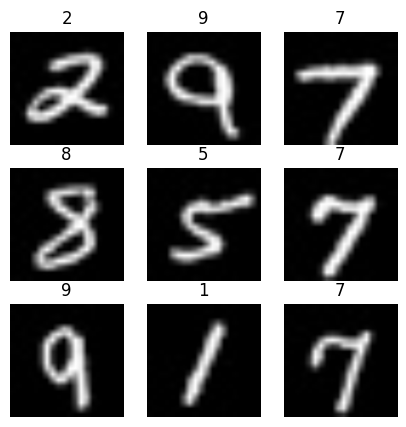

In [18]:
# Show the Different Classes and Their Example
data.show_batch(figsize=(5,5))

Below Are my Codes for the Three Different CNN Models.

All The Three Models: AlexNet, VGG and ResNet

In [19]:
# AlexNet

# Create Custom AlexNet Model
learn = vision_learner(data, alexnet, metrics=accuracy)
# Training Loop
learn.fit_one_cycle(4)
# Save the Model so we Can Restore It.
learn.save('stage-1')

# interp = ClassificationInterpretation.from_learner(learn)

# Can Show If Want to
# interp.plot_confusion_matrix()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 254MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.620989,0.317370,0.907000,08:42
1,0.695092,0.135231,0.963000,00:23
2,0.370127,0.097852,0.978000,00:23
3,0.271812,0.089437,0.975000,00:21


Path('/content/drive/MyDrive/MachinePerception/Assignment/CNN/models/stage-1.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.331561,0.185197,0.942000,00:23


SuggestedLRs(valley=5.248074739938602e-05)

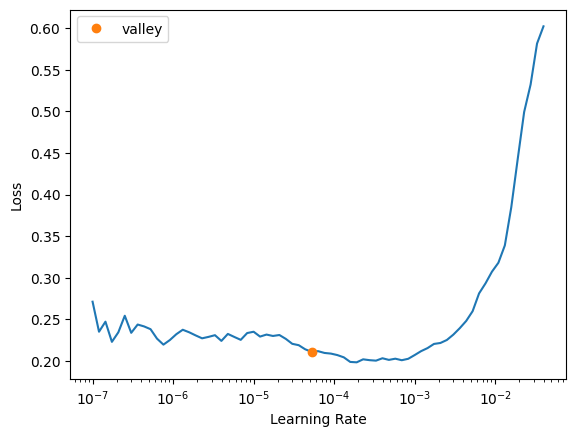

In [20]:
# Fine Tuning the Model. Unfreeze the Rest of Network and Train the Whole Data.
# We are only Training the Last Layer of the Network so Far.
learn.unfreeze()
learn.fit_one_cycle(1)

learn.load('stage-1')

# Here, the lr_find() Function will provide you with a Valley that is giving you a range of Training Rate
# Where your Model is Most likely to be Training Effective.
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.195540,0.054912,0.986000,00:21
1,0.153566,0.043540,0.991000,00:23


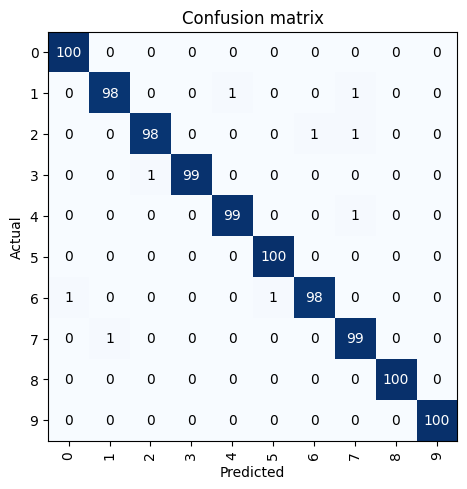

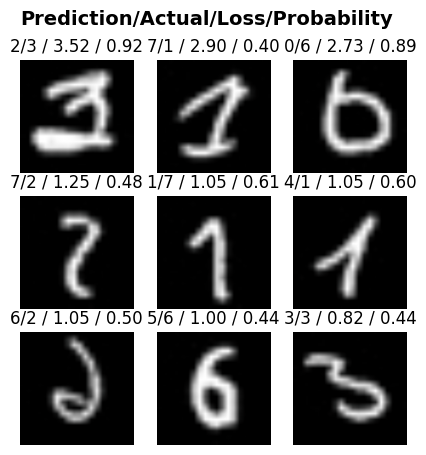

In [21]:
# Use the Suitable Training Rate to find Tune the Machine and Check for the Accuracy
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-5,1e-4))

interp = ClassificationInterpretation.from_learner(learn)

# Show Confusion Matrix
interp.plot_confusion_matrix()

# Show Pre/A/L/Pro to show a few of the One we predict wrong. Not all are wrong. it bases on the Accuracy of the Train.
losses, idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(5,5))

In [22]:
# VGGNet

learn = vision_learner(data, vgg16_bn, metrics=accuracy)
learn.fit_one_cycle(4)
learn.save('stage-2')

# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:06<00:00, 79.3MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.507839,0.254314,0.927000,01:00
1,0.584681,0.077265,0.979000,00:54
2,0.278051,0.039173,0.994000,00:53
3,0.153925,0.031734,0.994000,00:53


Path('/content/drive/MyDrive/MachinePerception/Assignment/CNN/models/stage-2.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.202103,0.045236,0.987000,01:09


SuggestedLRs(valley=3.311311274956097e-06)

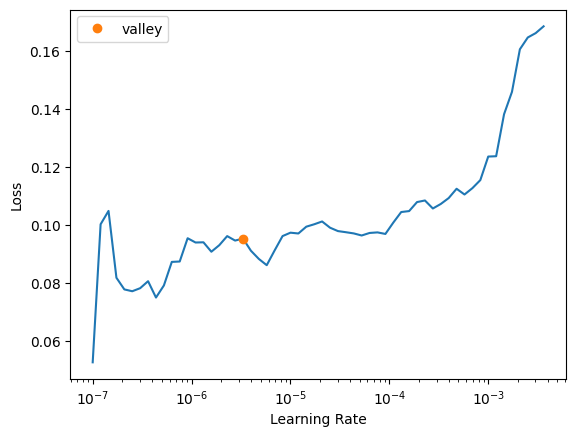

In [23]:
learn.unfreeze()
learn.fit_one_cycle(1)

learn.load('stage-2')
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.098680,0.024275,0.996000,01:11
1,0.089935,0.020415,0.998000,01:10


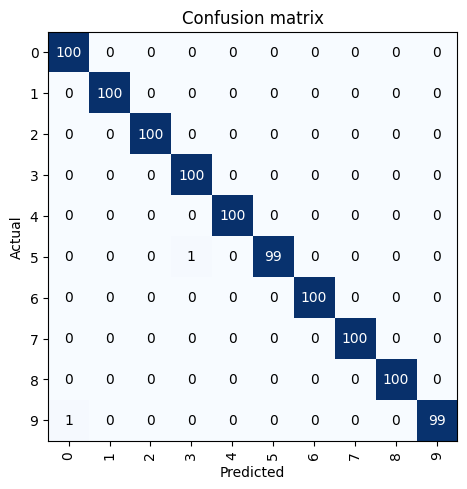

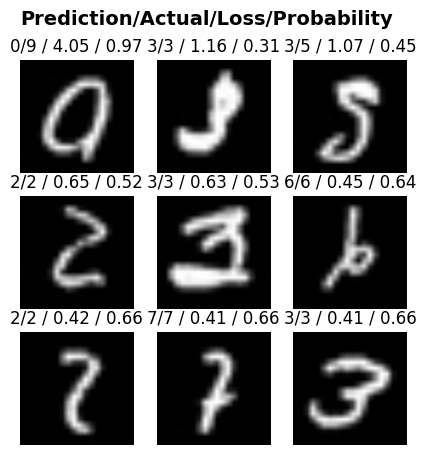

In [24]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-5))

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

losses, idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(5,5))

In [25]:
# ResNet

learn = vision_learner(data, resnet34, metrics=accuracy)  #use a resnet34 instead of alexnet
learn.fit_one_cycle(4)
learn.save('stage-3')

# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 244MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.376083,0.328188,0.899000,00:24
1,0.499214,0.051605,0.986000,00:25
2,0.217693,0.027459,0.991000,00:25
3,0.123017,0.022305,0.992000,00:27


Path('/content/drive/MyDrive/MachinePerception/Assignment/CNN/models/stage-3.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.219257,0.050701,0.984000,00:27


SuggestedLRs(valley=9.12010818865383e-07)

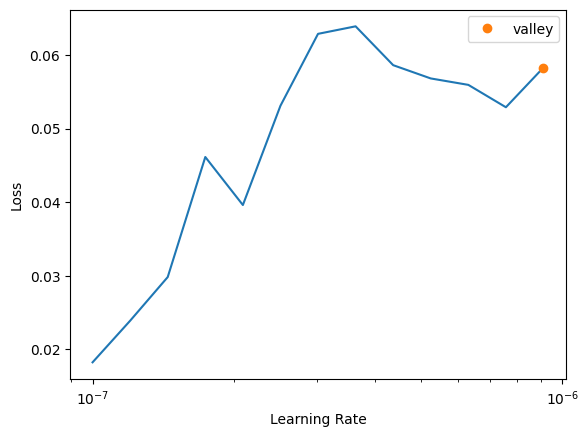

In [26]:
learn.unfreeze()
learn.fit_one_cycle(1)

learn.load('stage-3')
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.084284,0.011271,0.998000,00:27
1,0.051278,0.005739,0.999000,00:27


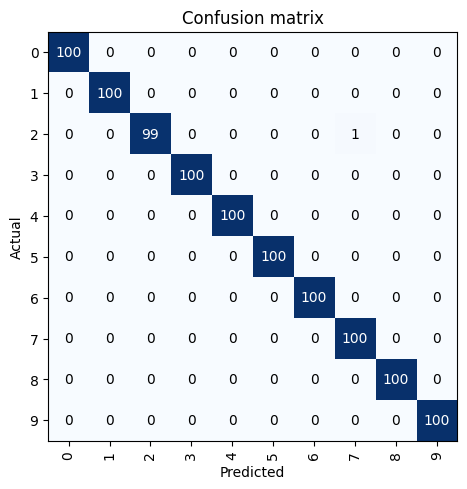

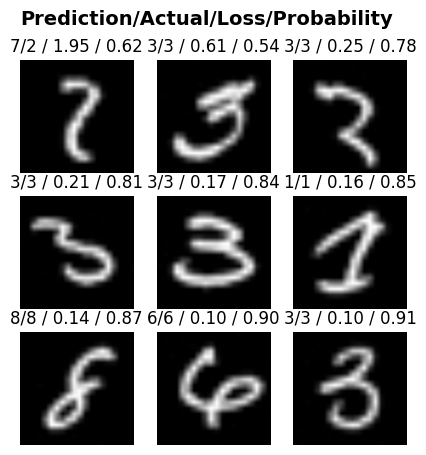

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-5,1e-4))

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

losses, idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(5,5))